<a href="https://colab.research.google.com/github/MagixIsAvailable/NLP_labs/blob/main/Copy_of_Lab04_Deep_learning_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 4 - Deep Learning

In this lab we will be introducing how to implement deep learning algorithms in Keras. In particular, we are going to focus on CNN and RNN architectures.

<br>

Frameworks:

Tensorflow - https://www.tensorflow.org/

Keras - https://keras.io/  

<br>

We will be looking at two core libraries in this lab, Tensorflow and Keras. Tensorflow is a large library which empowers many different types of machine learning algorithms, but is perhaps more popularly known as creating efficient data structures to underpin the learning of weights and biases in a neural network. Keras builds on top of Tensorflow and makes it much easier to read and to work with. As a result, within the last few years Tensorflow has integrated some of the Keras functionality within their library (though an external Keras library still exists). While you can examine the documentation for a more flexhed out answer, the easiest way to remember the difference between the two is that Tensorflow gives you access to the functionality while Keras makes it easier to read and code.


##Task 1 - Convolutional Neural Networks

Now let us examine how we can implement a deep learning algorithm on a simple problem.


In [2]:
%pip install tensorflow

import numpy as np #For the array functions
from tensorflow import keras #we will only be using tensorflow as a backend, so we will import keras via their implementation
from tensorflow.keras import layers #we will use the readable keras implementation of the conv/reccurent layers

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 8.1/332.0 MB 48.5 MB/s eta 0:00:07
   -- ------------------------------------- 19.1/332.0 MB 51.7 MB/s eta 0:00:07
   --- ------------------------------------ 31.5/332.0 MB 53.2 MB/s eta 0:00:06
   ----- ---------------------------------- 43.8/332.0 MB 54.3 MB/s eta 0:00:06
   ------ --------------------------------- 55.6/332.0 MB 55.2 MB/s eta 0:00:06
   -------- ------------------------------- 67.6/332.0 MB 55.9 MB/s eta 0:00:05
   --------- ------------------------------ 80.7/332.0 MB 56.6 MB/s eta 0:00:05
   ----------- ---------------------------- 92.8/332.0 MB 57.1 MB/s eta 0:00:05
   ------------ -------------------------- 106.2/332.0 MB 57.6 MB/s eta 0:00:04
   ------------- ------------------------- 118.5/332.0 MB 58.1 MB/s eta 0:00:04
   --------------- ----------------------- 131.3/332

Next let's load the dataset. While we could use any of the datasets we have examined in the module thus far, Keras also has some datasets stored within the library. This means they can be accessed quickly and efficiently. This also allows us to load the training and test sets directly using a split identified by the dataset designer.


Let's load the MNIST dataset. MNIST is a handwriting recognition task where the goal is to separate images into categories 0 to 9 (depending on the subject of the image).

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)


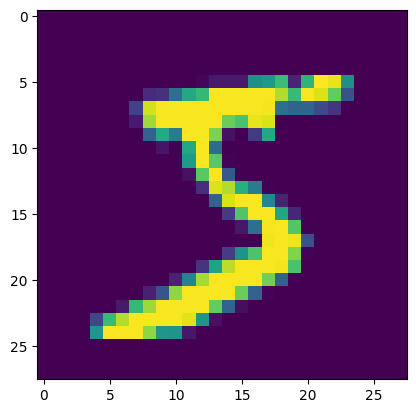

In [ ]:
#We can view the size and dimensions of each array by calling the shape attribute
print(x_train.shape)
#Calling the above will demonstrate we have 60,000 images in our training set, each of which are square images of 28 pixels high and wide

#We can view one of the images to see what it looks like
from PIL import Image #we import the pillow libary to convert arrays into images
import matplotlib.pyplot as plt #then import the matplotlib library to view the image in our code

img = Image.fromarray(x_train[0]) #we extract the image we want to view by taking a random image from the training set and using the fromArray() function to construct an image from pixel information
imgplot = plt.imshow(img) #we then plot the image
plt.show() #and show it

In [ ]:
#Next we will preprocess the dataset

#To start we will normalise the contents of the arrays. We will use min max normalisation, where we know the maximum value is 255
#This will scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#The next setps require us to identify the number of classes - in our problem we have 10
num_classes = 10

#Then we convert class vectors to one hot vectors - i.e. vectors of the size of number of classes, with a 1 in the class index and a 0 in every other class index
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now that we have our dataset, it is time to configure our CNN architecture.


In [ ]:
model = keras.Sequential( #first we create a model and specify we are using the Sequential configuration within Keras
    [
        keras.Input(shape=(28,28,1)), #Next we specify the size of our input layer. For MNIST, this will be 28 pixels by 28 pixels. The 1 indicates there is only a single colour dimension (black and white)
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), #Next we add a convolution layer.  We state there will be 32 filters, and each filter will be size 3 x 3
        layers.MaxPooling2D(pool_size=(2, 2)), #After the convolution layer we add a MP layer. The MP layer will summarise 2x2 portions of our activation matrix from our convolution layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), #we can repeat as often as necessary
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), #Eventually, we flatten the output of the last MP layer, so that it becomes a vector instead of a matrix
        layers.Dense(num_classes, activation="softmax"), #We then send to our outpt layyer (which has 10 neurons, one for each class) and a softmax activation function
    ]
)

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

We can then train and test the model and see how it performs on our data.

Warning, the below cell will take some time to complete (approx 5 - 10 minutes, or more if you increase the number of epochs).

In [ ]:
batch_size = 128 #the batch size is the number of examples the model will view before summing and backpropagating the loss
epochs = 10 #epochs are the number of training iterations examining the full training set

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) #We can set the model to compile. We call some inbuilt functions for our loss, optimizer and metrics respectively. Can you identify them from the lectures?
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs) #Finally, we train the model



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 119ms/step - accuracy: 0.4081 - loss: 1.9649
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.8826 - loss: 0.4058
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9142 - loss: 0.2930
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9303 - loss: 0.2394
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9393 - loss: 0.2028
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - accuracy: 0.9492 - loss: 0.1748
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9565 - loss: 0.1518
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9612 - loss: 0.1346
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.9642 - loss: 0.1245
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9688 - loss: 0.1094


In [ ]:
#We can then test our model on the test set
score = model.evaluate(x_test, y_test, verbose=0) #the model evaluate function contains some useful metrics to evaluate our model. We set verbose to 0 so we can print the ones we are interested in
print("Test loss:", score[0]) #Let's look at loss
print("Test accuracy:", score[1]) #And accuracy


Test loss: 0.09826838225126266
Test accuracy: 0.972100019454956


And there we have it, a functioning CNN on the MNIST dataset. Make sure to read over the code carefully and when you are ready attempt the exercises below.

### Task 1.1 - Exploring the Code
1.   What happens if you add an additional dense layer before the output layer? Why do you think this is the case?
2.   Try adjusting some of the hyperparameters in the code - for example, the number of convolutional filters, activations, etc. What effect does this have?

<br>

### Task 1.2 - Try it Out on Something New
Now you are confident in working with the code, try expanding the code to cover the CIFAR-10 dataset. This dataset is also available in Keras, so by exploring the documentation you should be able to load it in the same way as MNIST. However, the dataset preprocessing and the CNN architecture will need some adjustments to fit the new data.

<br>

### Task 1.3 - Extra
What changes would you have to make to the MNIST code so that you could use an MLP rather than a CNN model? Try exploring the documentation for ideas.



##Task 2 - Recurrent Neural Networks
Next let's have a look at how we could implement an RNN.

For this we will examine a many-to-one task - i.e. we have multiple sequential inputs, but we are only interested in generating a single label.

The task we will focus on is sentiment classification - a type of text classification where we want to allocate a sentiment category to a sentence. This is commonly used in areas like reviews or analysing feedback from social media posts.

The specific dataset we will look at today is the IMDB dataset. This is a collection of movie reviews from IMDB, and the goal is to identify whether the reviews were positive or negative just by reading the text. There are going to be some concepts for processing text which may be a little unfamiliar, but don't worry, we cover them next week.

In [ ]:
import numpy as np #For the array functions
from tensorflow import keras #we will only be using tensorflow as a backend, so we will import keras via their implementation
from tensorflow.keras import layers #we will use the readable keras implementation of the conv/reccurent layers
from keras.datasets import imdb #start by loading the dataset

#there's a lot of variation in weights, so let's fix random seed for reproducibility
np.random.seed(1337)

In [ ]:
#Then we want to load the dataset but only keep the top n words (ranked by how often they occur in the training set), and ignore less common words
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#We can view the size and dimensions of each array by calling the shape attribute
print(x_train.shape)
print(x_test.shape)
#Calling the above will demonstrate we have 25,000 reviews in our training and test sets

#Next, let's look at the unique labels in our dataset
print(set(y_train)) #casting as a set is a quick way we can identify the unique values in an array
#In this case we have two values - 1 and 0, corresponding to positive and negative. This is therefore a binary task

#Finally, let's have a look at an actual review
print(x_train[0])

(25000,)
(25000,)
{0, 1}
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


Uh oh, that doesn't quite look right - these are meant to be textual reviews, so what happened?

Well, to make the datasets smaller and easier to store, Keras has pre-emptively converted each word in the vocabulary to a number.

This number stores the index where the representation of the word exists (more on this over the next few week, but essentially each word is represented by its own vector)


In [ ]:
#To read the input to the network, we have to convert each index to its corresponding word
word_index = keras.datasets.imdb.get_word_index() #first we get the index list
inverted_word_index = dict((i, word) for (word, i) in word_index.items()) #then we create a local dictionary, storing each index and its corresponding word
print(" ".join(inverted_word_index[i] for i in x_train[0])) #finally, we can convert the review to text by iterating an example through the dictionary
#Keep in mind that we have only kept the 5,000 most common words. As a result, the sentence we print may be difficult to read.


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s and with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought and but of script you not while history he heart to real at an

Pad the Input

Next, we need to truncate and pad the input sequences so that they are all the same length for modeling. The model will learn the zero values carry no information so indeed the sequences are not the same length in terms of content, but same length vectors is required to perform the computation in Keras

In [ ]:
from keras.preprocessing import sequence #import the relevant function

# truncate and pad input sequences
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

Now we have finished preprocessing the dataset, we can move on to setting up our RNN architecture.

In [ ]:
from keras.layers import Embedding #first import the embedding layer. This is needed internally for Keras to convert the text indices to their representations

model = keras.Sequential( #first we create a model and specify we are using the Sequential configuration within Keras
    [
        Embedding(input_dim=top_words, output_dim=32, input_length=max_review_length), #We set up this layer using some of our parameters from earlier.
        layers.SimpleRNN(32, activation="relu"), #we then add a simpleRNN layer. Keras uses simple to mean the standard RNN, as much research is moving on to LSTM or GRU layers now.
        layers.Dense(1, activation='sigmoid') #Then we pass to out output. This layer has only a single neuron and a sigmoid activation function, as it will give either a 1 or 0 as output (facilitating binary classification)
    ]
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Finally, as before we can train the model
epochs = 3
batch_size = 64

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size) #similar to the CNN above, we can set our parameters and compile

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 130ms/step - accuracy: 0.5985 - loss: 0.6438
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.8149 - loss: 0.4247
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.8165 - loss: 0.4060


In [ ]:
#We can then test our model on the test set
score = model.evaluate(x_test, y_test, verbose=0) #the model evaluate function contains some useful metrics to evaluate our model. We set verbose to 0 so we can print the ones we are interested in
print("Test loss:", score[0]) #Let's look at loss
print("Test accuracy:", score[1]) #And accuracy

Test loss: 0.5236312747001648
Test accuracy: 0.7271199822425842


Voila, a functioning RNN on the IMDB dataset. Make sure to read over the code carefully and when you are ready attempt the exercises below.

### Task 2.1 - Exploring the Code
1.   What happens if you add an additional aimple RNN layer before the output layer? Why do you think this is the case?
2.   Try adjusting some of the hyperparameters in the code - for example, the optimizer, number of epochs, etc. What effect does this have?

<br>

### Task 2.2 - Try it Out on Something New
As with the CNN, it's a good idea to get comfortable applying new datasets. With that in mind, try writing the code to apply this to the Reuters Newswire dataset (or do feel free to select a dataset from UCI).

<br>